In [62]:
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

irisDataset = load_iris()
print('Keys of Iris Dataset : ', irisDataset.keys())

Keys of Iris Dataset :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [63]:
print(irisDataset['DESCR'][:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


Target names that we want to predict

In [64]:
print('Target names : ', irisDataset['target_names'])

Target names :  ['setosa' 'versicolor' 'virginica']


feature_names is a list of string with description of each feature

In [65]:
print('Feature Name : ', irisDataset['feature_names'])

Feature Name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [66]:
print('Data type : ', type(irisDataset['data']))
print('Data shape : ', irisDataset['data'].shape)
irisDataset['data'][:5]

Data type :  <class 'numpy.ndarray'>
Data shape :  (150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Train test split

In [67]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(irisDataset['data'], irisDataset['target'], random_state = 2)
print('X Train shape : ', xTrain.shape)
print('Y Train shape : ', yTrain.shape)
print('X Test shape : ', xTest.shape)
print('Y Test shape : ', yTest.shape)

X Train shape :  (112, 4)
Y Train shape :  (112,)
X Test shape :  (38, 4)
Y Test shape :  (38,)


pair plot of the dataset to check whether a machine learning model for the dataset is a good fit

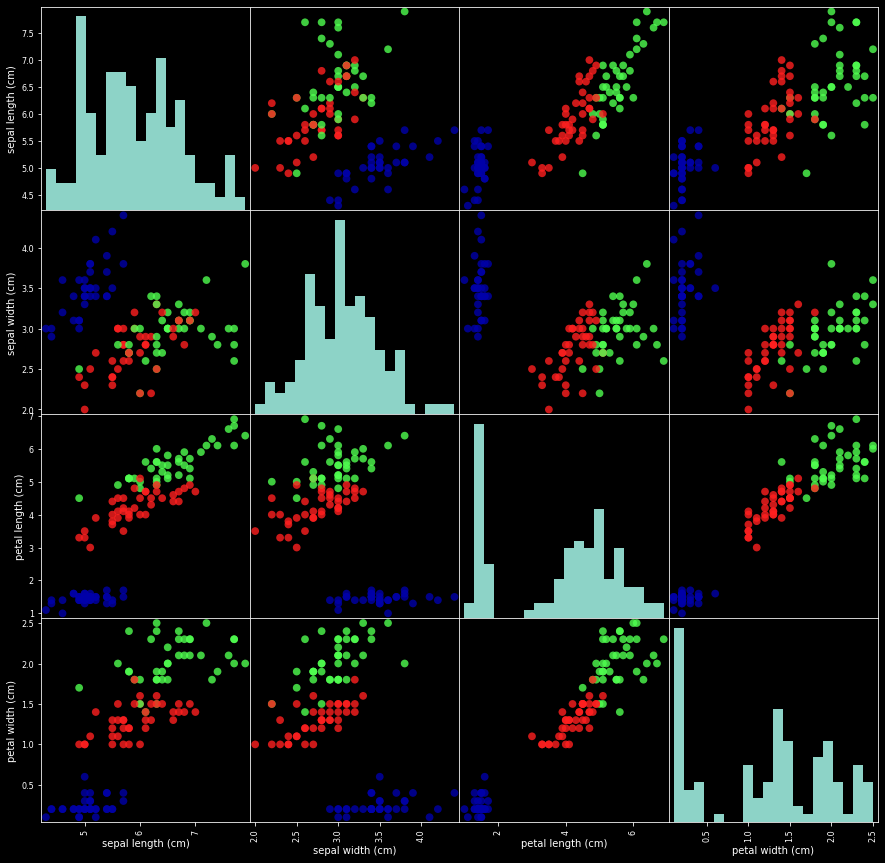

In [68]:
# Create dataframe from data in xTrain using pandas
# Label the columns using the strings in irisDataset.feature_names
irisDataframe = pd.DataFrame(xTrain, columns = irisDataset.feature_names)

# Create a scatter matrix from the dataframe, color by yTrain
pd.plotting.scatter_matrix(irisDataframe, c = yTrain, figsize = (15, 15), marker = 'o', hist_kwds = {'bins' : 20}, s = 60, alpha = .8, cmap = mglearn.cm3)
plt.style.use(['dark_background'])

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=1)

In [70]:
xNew = np.array([[5, 2.9, 1, 0.2]])
print('New iris shape : ', xNew.shape)

New iris shape :  (1, 4)


In [72]:
prediction = knn.predict(xNew)
print('Prediction : ', prediction)
print('Predicted Target name : ', irisDataset['target_names'][prediction])

Prediction :  [0]
Predicted Target name :  ['setosa']


Evaluating the model

In [73]:
yHat = knn.predict(xTest)
print('Test Score : %.2f' % np.mean(yHat == yTest))
print('KNN Score : %.2f' % knn.score(xTest, yTest))

Test Score : 1.00
KNN Score : 1.00
